# Projections

In various ways, you are likely to be familiar with the concept of **projection**. You may have encountered it in geography classes, through work related to graphics, or perhaps even in therapy sessions. It might also appear in philosophy readings or science-fiction movies. Usually, this term is associated with transferring certain properties of one object to another or carrying an image between two different spaces.

Interestingly, this intuitive idea also holds in mathematics, where projections are used across different fields. In this discussion, we focus on **vector projections**, which are closely related to the concept of **orthogonality** and provide a compelling geometric interpretation.

At first glance, projections may seem somewhat simplistic or not immediately applicable. However, it is important to recognize that vector projections are an extremely powerful tool for fundamental constructions in linear algebra. Their importance should not be underestimated.


## A helpful visual intuition

Imagine a light source sending a broad, parallel beam of light perpendicular to a straight line. In this scenario, the projection of a vector onto this line can be visualized as its shadow (see the picture).


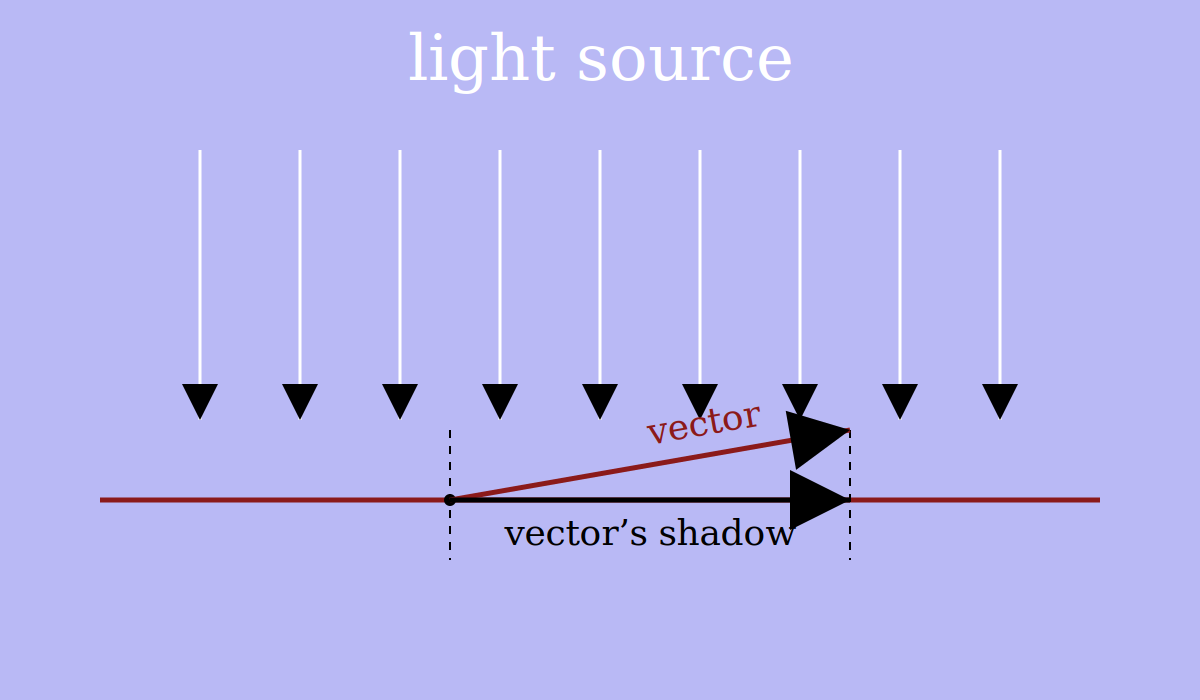

In [1]:
from IPython.display import SVG, display

svg_code = r"""
<svg xmlns="http://www.w3.org/2000/svg" width="1200" height="700" viewBox="0 0 1200 700">
  <rect x="0" y="0" width="1200" height="700" fill="#b9b9f5"/>

  <text x="600" y="80" text-anchor="middle"
        font-size="64" font-family="serif" fill="white">
    light source
  </text>

  <!-- ONE correct arrow marker -->
  <defs>
    <marker id="arrow"
            markerWidth="12"
            markerHeight="12"
            refX="12"
            refY="6"
            orient="auto"
            markerUnits="strokeWidth">
      <path d="M0,0 L12,6 L0,12 Z" fill="currentColor"/>
    </marker>
  </defs>

  <!-- Light rays -->
  <g stroke="white" stroke-width="3" marker-end="url(#arrow)">
    <line x1="200" y1="150" x2="200" y2="420"/>
    <line x1="300" y1="150" x2="300" y2="420"/>
    <line x1="400" y1="150" x2="400" y2="420"/>
    <line x1="500" y1="150" x2="500" y2="420"/>
    <line x1="600" y1="150" x2="600" y2="420"/>
    <line x1="700" y1="150" x2="700" y2="420"/>
    <line x1="800" y1="150" x2="800" y2="420"/>
    <line x1="900" y1="150" x2="900" y2="420"/>
    <line x1="1000" y1="150" x2="1000" y2="420"/>
  </g>

  <!-- Ground line -->
  <line x1="100" y1="500" x2="1100" y2="500"
        stroke="#8b1a1a" stroke-width="5"/>

  <!-- Origin -->
  <circle cx="450" cy="500" r="6" fill="black"/>

  <!-- Vertical guides -->
  <line x1="450" y1="430" x2="450" y2="560"
        stroke="black" stroke-width="2" stroke-dasharray="8,8"/>
  <line x1="850" y1="430" x2="850" y2="560"
        stroke="black" stroke-width="2" stroke-dasharray="8,8"/>

  <!-- Vector -->
  <line x1="450" y1="500" x2="850" y2="430"
        stroke="#8b1a1a" stroke-width="5"
        marker-end="url(#arrow)"/>

  <text x="650" y="445" font-size="36" font-family="serif"
        fill="#8b1a1a" transform="rotate(-10 650 445)">
    vector
  </text>

  <!-- Vector shadow -->
  <line x1="450" y1="500" x2="850" y2="500"
        stroke="black" stroke-width="5"
        marker-end="url(#arrow)"/>

  <text x="650" y="545" text-anchor="middle"
        font-size="36" font-family="serif" fill="black">
    vector’s shadow
  </text>
</svg>
"""

display(SVG(svg_code))


Although this representation is not the most precise definition of a projection, it does provide some valuable insights. For instance, when a vector lies on the line, its projection coincides with the vector itself. This represents the maximum length a projection can achieve, since in any other case a vector will have a greater magnitude than its projection.


## A geometric definition

Let us now give a precise geometric definition of a projection, without relying on physical analogies. Up to this point, we have discussed the projection of a vector onto a line; however, it turns out to be more natural to define the projection of a vector onto another vector.

Consider two vectors $\vec{a}$ and $\vec{e}$:


In [2]:
from IPython.display import display, HTML

html = r"""
<div id="vector-figure" style="
    position: relative;
    width: 600px;
    height: 900px;
">

<!-- SVG -->
<svg xmlns="http://www.w3.org/2000/svg"
     width="600" height="900" viewBox="0 0 600 900"
     style="position:absolute; top:0; left:0; z-index:1;">

  <rect x="0" y="0" width="600" height="900" fill="white"/>

  <defs>
    <marker id="arrow"
            markerWidth="12"
            markerHeight="12"
            refX="12"
            refY="6"
            orient="auto"
            markerUnits="strokeWidth">
      <path d="M0,0 L12,6 L0,12 Z" fill="black"/>
    </marker>
  </defs>

  <!-- Origin -->
  <circle cx="200" cy="780" r="6" fill="black"/>

  <!-- Vector a -->
  <line x1="200" y1="780" x2="320" y2="120"
        stroke="black" stroke-width="4"
        marker-end="url(#arrow)"/>

  <!-- Vector e -->
  <line x1="200" y1="780" x2="350" y2="520"
        stroke="black" stroke-width="4"
        marker-end="url(#arrow)"/>

</svg>

<!-- Labels -->
<div style="
    position:absolute;
    left: 332px;
    top: 92px;
    z-index: 10;
    font-size: 44px;
    color: black;
">
  $\vec{a}$
</div>

<div style="
    position:absolute;
    left: 362px;
    top: 492px;
    z-index: 10;
    font-size: 44px;
    color: black;
">
  $\vec{e}$
</div>


</div>

<script>
  if (window.MathJax) {
    MathJax.typesetPromise();
  }
</script>
"""

display(HTML(html))


In [3]:
from IPython.display import display, HTML

html = r"""
<div id="vector-figure" style="
    position: relative;
    width: 600px;
    height: 900px;
">

<!-- ================= SVG LAYER ================= -->
<svg xmlns="http://www.w3.org/2000/svg"
     width="600" height="900" viewBox="0 0 600 900"
     style="position:absolute; top:0; left:0; z-index:1;">

  <rect x="0" y="0" width="600" height="900" fill="white"/>

  <!-- Arrow marker (single, correct) -->
  <defs>
    <marker id="arrow"
            markerWidth="12"
            markerHeight="12"
            refX="12"
            refY="6"
            orient="auto"
            markerUnits="strokeWidth">
      <path d="M0,0 L12,6 L0,12 Z" fill="black"/>
    </marker>
  </defs>

  <!-- Origin -->
  <circle cx="200" cy="780" r="6" fill="black"/>

  <!-- Vector a -->
  <line x1="200" y1="780" x2="320" y2="120"
        stroke="black"
        stroke-width="4"
        marker-end="url(#arrow)"/>

  <!-- Vector e -->
  <line x1="200" y1="780" x2="350" y2="520"
        stroke="black"
        stroke-width="4"
        marker-end="url(#arrow)"/>

  <!-- Dashed extension of e -->
  <line x1="350" y1="520" x2="500" y2="360"
        stroke="gray"
        stroke-width="3"
        stroke-dasharray="10,10"/>

</svg>

<!-- ================= MATHJAX LABELS ================= -->

<!-- Label for vector a -->
<div style="
    position:absolute;
    left: 330px;
    top: 90px;
    z-index: 10;
    font-size: 48px;
    color: black;
    background: white;
    padding: 2px 6px;
">
  $\vec{a}$
</div>

<!-- Label for vector e -->
<div style="
    position:absolute;
    left: 360px;
    top: 500px;
    z-index: 10;
    font-size: 48px;
    color: black;
    background: white;
    padding: 2px 6px;
">
  $\vec{e}$
</div>

</div>

<!-- Force MathJax to typeset injected HTML -->
<script>
  if (window.MathJax) {
    MathJax.typesetPromise();
  }
</script>
"""

display(HTML(html))


In [4]:
from IPython.display import display, HTML

html = r"""
<script src="https://cdn.jsdelivr.net/npm/mathjax@3/es5/tex-chtml.js"></script>

<svg width="600" height="900" viewBox="0 0 600 900"
     xmlns="http://www.w3.org/2000/svg"
     style="background:white">

  <!-- background -->
  <rect width="100%" height="100%" fill="white"/>

  <defs>
    <marker id="arrow" markerWidth="10" markerHeight="10"
            refX="8" refY="5" orient="auto">
      <path d="M0,0 L10,5 L0,10 Z" fill="black"/>
    </marker>
  </defs>

  <!-- main vectors -->
  <line x1="120" y1="780" x2="300" y2="160"
        stroke="black" stroke-width="4"
        marker-end="url(#arrow)"/>

  <line x1="120" y1="780" x2="300" y2="520"
        stroke="black" stroke-width="4"
        marker-end="url(#arrow)"/>

  <!-- dashed projection lines -->
  <line x1="300" y1="160" x2="460" y2="360"
        stroke="#999" stroke-width="3"
        stroke-dasharray="10,10"/>

  <line x1="300" y1="520" x2="460" y2="360"
        stroke="#999" stroke-width="3"
        stroke-dasharray="10,10"/>

  <!-- points -->
  <circle cx="120" cy="780" r="6" fill="black"/>
  <circle cx="460" cy="360" r="6" fill="black"/>

  <!-- true right-angle marker (parallel to dashed lines) -->
  <line x1="445" y1="345" x2="455" y2="355"
        stroke="black" stroke-width="3"/>
  <line x1="455" y1="355" x2="475" y2="345"
        stroke="black" stroke-width="3"/>

  <!-- LaTeX labels via foreignObject (never clipped) -->
  <foreignObject x="290" y="120" width="80" height="60">
    <div xmlns="http://www.w3.org/1999/xhtml"
         style="font-size:26px;">
      $$\vec{a}$$
    </div>
  </foreignObject>

  <foreignObject x="290" y="490" width="80" height="60">
    <div xmlns="http://www.w3.org/1999/xhtml"
         style="font-size:26px;">
      $$\vec{e}$$
    </div>
  </foreignObject>

</svg>
"""
display(HTML(html))


- A projection of a vector $\vec a$ onto a vector $\vec e$ in a Euclidean space
  with inner product $\langle \cdot \mid \cdot \rangle$ is defined as

$$
\operatorname{proj}_{\vec e}(\vec a)
=
\frac{\langle \vec a, \vec e \rangle}{\langle \vec e, \vec e \rangle}\,\vec e
$$